In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
s_df = pd.read_csv('../data/garmin/sleep.csv', sep=',')

# Trim columns
s_df = s_df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source', 'Sleep Efficiency', 'Sleep Score Value']]

# Convert data types
s_df['Calendar Date (Local)'] = pd.to_datetime(s_df['Calendar Date (Local)'])

# Add column with calculated sleep hours
s_df['Duration (h)'] = s_df['Duration (s)'] / 60 / 60
s_df['Deep Sleep Duration (h)'] = s_df['Deep Sleep Duration (s)'] / 60 / 60
s_df['Light Sleep Duration (h)'] = s_df['Light Sleep Duration (s)'] / 60 / 60
s_df['Rem Sleep Duration (h)'] = s_df['Rem Sleep Duration (s)'] / 60 / 60

s_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
1,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
2,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
3,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
4,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3792,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3793,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3794,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000


In [3]:
# Clean data for comparison between individuals
df_users = s_df.drop_duplicates(subset=['Calendar Date (Local)', 'User First Name'])

# Filter for device source
df_users = df_users[df_users['Source'] == 'device']

print(df_users['User First Name'].unique())

df_users

['P10' 'P11' 'P12' 'P14']


,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.600000,2.333333
196,P10,2023-12-24,2023-12-24T01:13:00,2023-12-24T08:56:00,27780,6000,5580,15060,device,0.958963,81.0,7.716667,1.550000,4.183333,1.666667
276,P10,2023-12-25,2023-12-25T01:07:00,2023-12-25T09:41:00,30840,11160,6780,12900,device,1.000000,91.0,8.566667,1.883333,3.583333,3.100000
320,P10,2023-12-26,2023-12-26T01:50:00,2023-12-26T09:03:00,25980,6960,6240,12780,device,1.000000,90.0,7.216667,1.733333,3.550000,1.933333
339,P10,2023-12-27,2023-12-27T01:20:00,2023-12-27T09:16:00,28560,8040,5460,14640,device,0.985294,98.0,7.933333,1.516667,4.066667,2.233333
363,P10,2023-12-28,2023-12-28T00:54:00,2023-12-28T08:48:00,28440,6660,6960,14280,device,0.981013,91.0,7.900000,1.933333,3.966667,1.850000
405,P10,2023-12-29,2023-12-29T23:54:00,2023-12-30T08:58:00,32640,9660,3360,19560,device,0.998162,91.0,9.066667,0.933333,5.433333,2.683333
419,P10,2023-12-31,2023-12-31T00:40:00,2023-12-31T09:08:00,30480,10680,7620,12060,device,0.996063,94.0,8.466667,2.116667,3.350000,2.966667
514,P10,2024-01-02,2024-01-02T00:22:00,2024-01-02T09:27:00,32700,19920,10080,35280,device,0.996330,93.0,9.083333,2.800000,9.800000,5.533333
661,P10,2024-01-04,2024-01-04T01:32:00,2024-01-04T09:25:00,28380,8640,5400,14340,device,1.000000,91.0,7.883333,1.500000,3.983333,2.400000


# Sleep Quality and Sleep Duration
## Accross all users

Correlation Coefficient: 0.49042558204530734


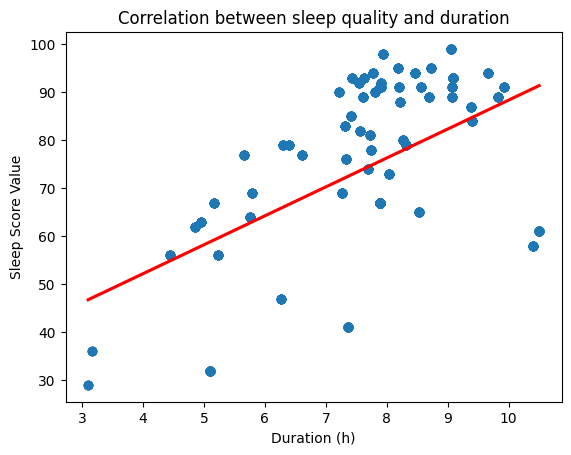

In [6]:
column1 = s_df['Duration (h)']
column2 = s_df['Sleep Score Value']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title('Correlation between sleep quality and duration')

# Display the plot
plt.show()

## Aggregated average

In [8]:
df_x = df_users.groupby('User First Name')[['Sleep Efficiency', 'Sleep Score Value', 'Duration (h)', 'Deep Sleep Duration (h)', 'Light Sleep Duration (h)', 'Rem Sleep Duration (h)']].mean()
df_x

,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
User First Name,,,,,,
P10,0.991583,91.400000,8.160000,1.680000,4.651667,2.670000
P11,0.867166,65.333333,6.527778,1.741667,3.722222,1.377778
P12,0.742926,69.333333,7.412037,2.288889,8.555556,2.420370
P14,0.986199,90.307692,7.836372,1.402083,4.957292,1.842622


Correlation Coefficient: 0.899943078622799


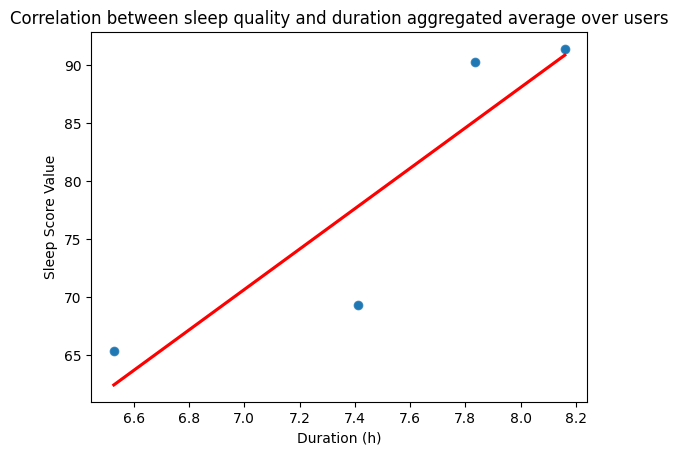

In [9]:
column1 = df_x['Duration (h)']
column2 = df_x['Sleep Score Value']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title('Correlation between sleep quality and duration aggregated average over users')

# Display the plot
plt.show()

## Breakdown to individual users

Correlation Coefficient: 0.224347076393802


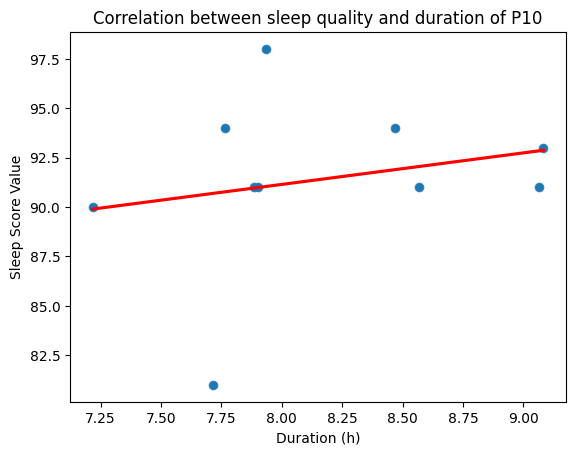

Correlation Coefficient: 0.5689383590758257


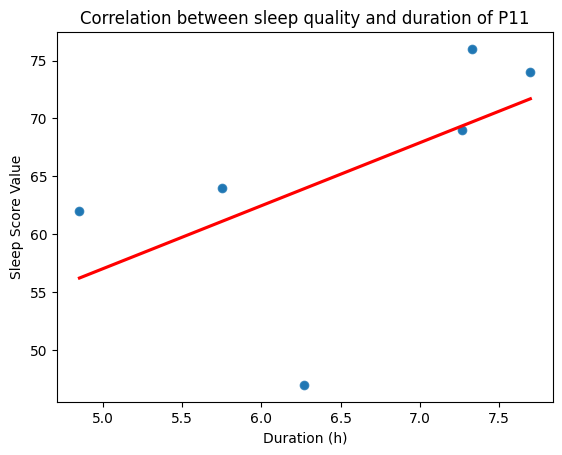

Correlation Coefficient: 0.6073186813484126


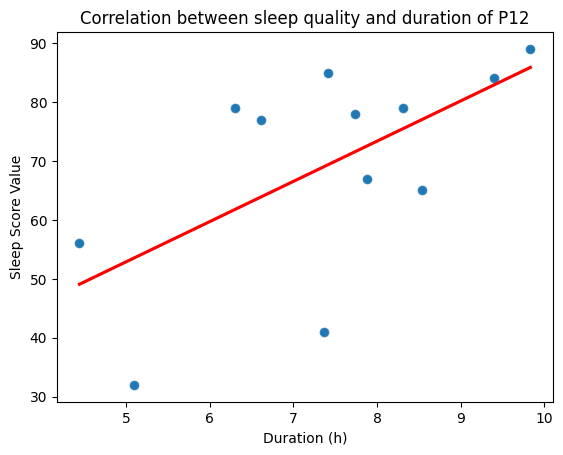

Correlation Coefficient: 0.39742763284921157


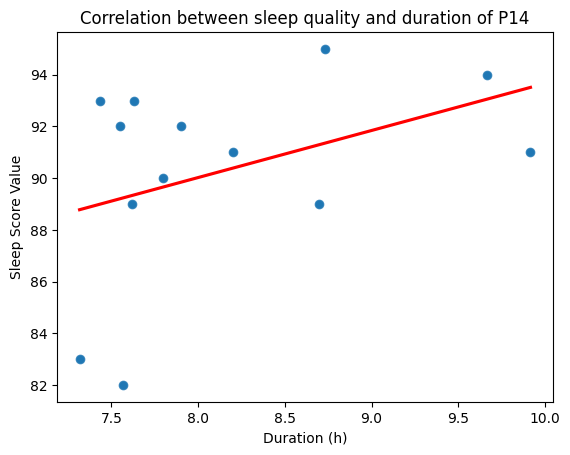

In [7]:
# Breakdown to individual users

for user in df_users['User First Name'].unique():
    df_user = df_users[df_users['User First Name'] == user]
    column1 = df_user['Duration (h)']
    column2 = df_user['Sleep Score Value']

    # Calculate the correlation coefficient
    correlation_coefficient = column1.corr(column2)

    print(f'Correlation Coefficient: {correlation_coefficient}')

    # Create a scatter plot
    sns.scatterplot(x=column1, y=column2)

    # Add a regression line and correlation coefficient
    sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
    plt.title(f'Correlation between sleep quality and duration of {user}')

    # Display the plot
    plt.show()